In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Cargar los datos
df_train = pd.read_csv("train.csv")

# Crear la variable categórica a partir de SalePrice
q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)
df_train['PriceCategory'] = pd.cut(df_train['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

# Definir X e y
X = df_train.select_dtypes(include=np.number).drop(['SalePrice'], axis=1)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = df_train['PriceCategory'].loc[X.index]

# Codificar la variable de salida
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)




In [4]:
#Modelo 1
model1 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model1.fit(X_train, y_train)

print("🔹 Modelo 1 (ReLU + Adam):")
print(classification_report(y_test, model1.predict(X_test), target_names=encoder.classes_))


🔹 Modelo 1 (ReLU + Adam):
              precision    recall  f1-score   support

       Caras       0.90      0.83      0.86        88
  Económicas       0.80      0.81      0.80        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.83      0.84       337
weighted avg       0.84      0.84      0.84       337



In [5]:
#Modelo 2
model2 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=500, random_state=42)
model2.fit(X_train, y_train)

print("🔸 Modelo 2 (tanh + SGD):")
print(classification_report(y_test, model2.predict(X_test), target_names=encoder.classes_))


🔸 Modelo 2 (tanh + SGD):
              precision    recall  f1-score   support

       Caras       0.91      0.85      0.88        88
  Económicas       0.78      0.80      0.79        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.84      0.84       337
weighted avg       0.84      0.84      0.84       337



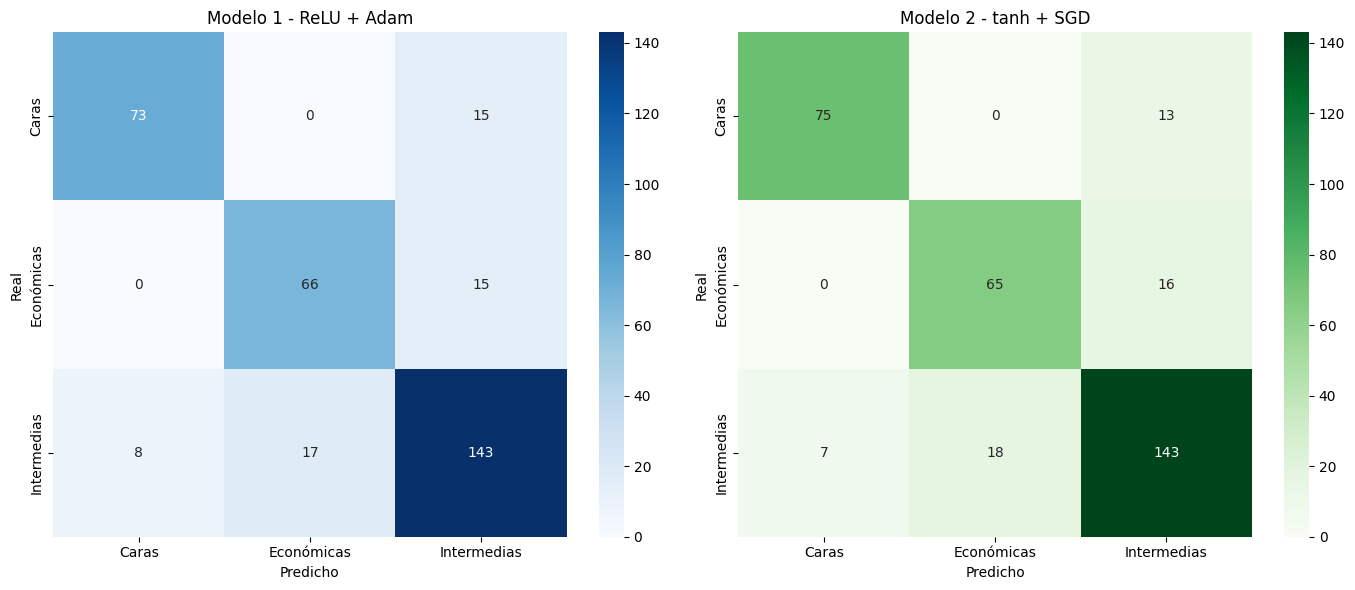

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir etiquetas
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Obtener etiquetas originales
labels = encoder.classes_

# Matrices de confusión
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

# Graficar ambas matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Modelo 1 - ReLU + Adam")
axes[0].set_xlabel("Predicho")
axes[0].set_ylabel("Real")

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Modelo 2 - tanh + SGD")
axes[1].set_xlabel("Predicho")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


In [7]:
# INCISO 6: COMPARACIÓN DE LOS MODELOS DE CLASIFICACIÓN. (REDES NEURONALES)
import time
from sklearn.metrics import accuracy_score

# Medir tiempo de entrenamiento y evaluación para Modelo 1
start1 = time.time()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
end1 = time.time()
time1 = end1 - start1

# Medir tiempo de entrenamiento y evaluación para Modelo 2
start2 = time.time()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
end2 = time.time()
time2 = end2 - start2

# Accuracy y métricas
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

print(f"🔹 Modelo 1 (ReLU + Adam)")
print(f"   Accuracy: {acc1:.4f}")
print(f"   Tiempo de procesamiento: {time1:.2f} segundos")
print(classification_report(y_test, y_pred1, target_names=encoder.classes_))

print(f"\n🔸 Modelo 2 (tanh + SGD)")
print(f"   Accuracy: {acc2:.4f}")
print(f"   Tiempo de procesamiento: {time2:.2f} segundos")
print(classification_report(y_test, y_pred2, target_names=encoder.classes_))


🔹 Modelo 1 (ReLU + Adam)
   Accuracy: 0.8368
   Tiempo de procesamiento: 1.53 segundos
              precision    recall  f1-score   support

       Caras       0.90      0.83      0.86        88
  Económicas       0.80      0.81      0.80        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.83      0.84       337
weighted avg       0.84      0.84      0.84       337


🔸 Modelo 2 (tanh + SGD)
   Accuracy: 0.8398
   Tiempo de procesamiento: 4.29 segundos
              precision    recall  f1-score   support

       Caras       0.91      0.85      0.88        88
  Económicas       0.78      0.80      0.79        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.84      0.84       337
weighted avg       0.84      0.84      0.84       337



In [8]:
# ANALISIS DE SOBRE AJUSTE:
train_acc1 = accuracy_score(y_train, model1.predict(X_train))
test_acc1 = accuracy_score(y_test, y_pred1)

train_acc2 = accuracy_score(y_train, model2.predict(X_train))
test_acc2 = accuracy_score(y_test, y_pred2)

print("🔍 Sobreajuste - Modelo 1:")
print(f"   Entrenamiento: {train_acc1:.4f}")
print(f"   Prueba: {test_acc1:.4f}")

print("🔍 Sobreajuste - Modelo 2:")
print(f"   Entrenamiento: {train_acc2:.4f}")
print(f"   Prueba: {test_acc2:.4f}")

🔍 Sobreajuste - Modelo 1:
   Entrenamiento: 1.0000
   Prueba: 0.8368
🔍 Sobreajuste - Modelo 2:
   Entrenamiento: 1.0000
   Prueba: 0.8398


In [9]:
# TUNEAR HYPERPARAMETROS PARA EL MEJOR MODELO
# optimmizar el MLP classifier 
from sklearn.model_selection import GridSearchCV

# Definir nuevo clasificador
mlp = MLPClassifier(max_iter=500, random_state=42)

# Definir la grilla de búsqueda
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("🔧 Mejor combinación de parámetros:")
print(grid.best_params_)

# Evaluar el mejor modelo
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n📈 Resultados del mejor modelo optimizado:")
print(classification_report(y_test, y_pred_best, target_names=encoder.classes_))

🔧 Mejor combinación de parámetros:
{'activation': 'tanh', 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.01, 'solver': 'sgd'}

📈 Resultados del mejor modelo optimizado:
              precision    recall  f1-score   support

       Caras       0.91      0.89      0.90        88
  Económicas       0.81      0.88      0.84        81
 Intermedias       0.88      0.85      0.86       168

    accuracy                           0.87       337
   macro avg       0.86      0.87      0.87       337
weighted avg       0.87      0.87      0.87       337



c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# SELECCIONAR SALEPRICE COMO VARIABLE RESPUESTA
# Reutilizar X (ya está limpio)
y_reg = df_train['SalePrice'].loc[X.index]

# Separar en train y test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.3, random_state=42)

In [11]:
# DOS MODELOS DE REGRESION CON REDES NEURONALES
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelo 1
reg1 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
reg1.fit(X_train_r, y_train_r)
pred1 = reg1.predict(X_test_r)

# Modelo 2
reg2 = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=1000, random_state=42)
reg2.fit(X_train_r, y_train_r)
pred2 = reg2.predict(X_test_r)

# Evaluación
def eval_model(y_true, y_pred, name):
    print(f"📊 {name}")
    print(f"   MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"   RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"   R²  : {r2_score(y_true, y_pred):.4f}\n")

eval_model(y_test_r, pred1, "Modelo 1 (ReLU + Adam)")
eval_model(y_test_r, pred2, "Modelo 2 (tanh + SGD)")


c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


📊 Modelo 1 (ReLU + Adam)
   MAE : 47879.01
   RMSE: 65157.01
   R²  : 0.4688

📊 Modelo 2 (tanh + SGD)
   MAE : 47466.19
   RMSE: 72771.28
   R²  : 0.3373



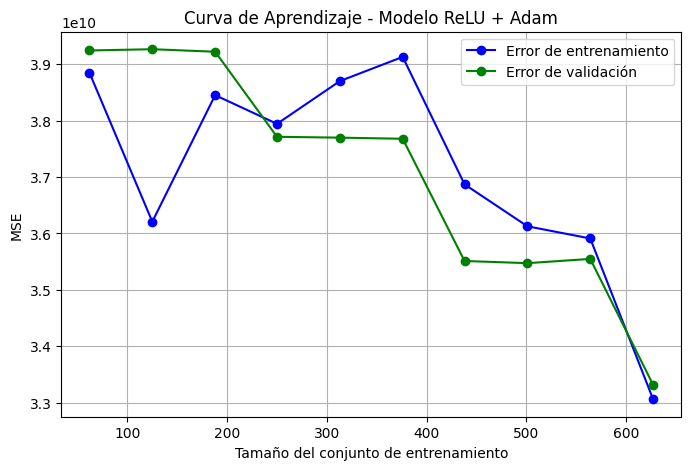

In [12]:
# EJERCICIO 12:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np

# Definir el modelo base
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Obtener curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_r, y_train_r, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular la media y desviación estándar
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Graficar la curva
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Error de entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Error de validación')
plt.title("Curva de Aprendizaje - Modelo ReLU + Adam")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
#EJERCICIO 13: TUNER PARAMETROS DEL MEJOR MODELO. 
# buscamos hiperparámetros optimos con GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [1000]
}

grid_search = GridSearchCV(MLPRegressor(activation='relu', solver='adam', random_state=42),
                           param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_r, y_train_r)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (MSE):", -grid_search.best_score_)

Mejores parámetros: {'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'max_iter': 1000}
Mejor puntuación (MSE): 2522227873.7320795


c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# Evaluar el nuevo modelo con mejores hiperparámetros	
# Modelo afinado
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_r)

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("🔧 Modelo Tuned")
print("MAE :", mean_absolute_error(y_test_r, y_pred_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_tuned)))
print("R²  :", r2_score(y_test_r, y_pred_tuned))


🔧 Modelo Tuned
MAE : 23994.884694503056
RMSE: 38502.56276457594
R²  : 0.8144962219283414


# 📊 Comparación de Modelos de Regresión con Redes Neuronales

Este análisis compara dos modelos de regresión desarrollados con redes neuronales para predecir el precio de viviendas (`SalesPrice`). Ambos modelos utilizan la clase `MLPRegressor` de `sklearn.neural_network`, pero con diferentes funciones de activación y algoritmos de optimización.

---

## 🔢 Resultados de Evaluación

| Métrica     | Modelo 1 (ReLU + Adam) | Modelo 2 (tanh + SGD) | Mejor modelo |
|-------------|------------------------|------------------------|---------------|
| MAE         | 47,879.01              | 47,466.19              | Modelo 2      |
| RMSE        | 65,157.01              | 72,771.28              | Modelo 1      |
| R² (R-cuadrado) | 0.4688                | 0.3373                | Modelo 1      |

---

## ✅ Conclusiones

- **Modelo 1 (ReLU + Adam)** logra un menor RMSE y un mayor R², indicando mejor precisión general y capacidad de explicar la varianza de los datos.
- Aunque **Modelo 2 (tanh + SGD)** tiene un MAE levemente mejor, su alto RMSE y bajo R² indican menor confiabilidad.
- Por lo tanto, el **Modelo 1 es el más efectivo para predecir el precio de las casas**.

---

## 🤖 Descripción de los Modelos

### 🔸 Modelo 1: ReLU + Adam
- **Tipo de red:** MLPRegressor (Perceptrón Multicapa)
- **Función de activación:** `ReLU` (Rectified Linear Unit)
  - Eficiente en redes profundas.
  - Minimiza el problema del gradiente desvanecido.
- **Optimizador:** `Adam`
  - Optimización adaptativa, combina Momentum y RMSProp.
  - Mejor convergencia en problemas ruidosos o dispersos.

### 🔹 Modelo 2: tanh + SGD
- **Tipo de red:** MLPRegressor (Perceptrón Multicapa)
- **Función de activación:** `tanh` (Tangente hiperbólica)
  - Función no lineal centrada en cero.
  - Propenso al gradiente desvanecido.
- **Optimizador:** `SGD` (Stochastic Gradient Descent)
  - Requiere tuning cuidadoso.
  - Convergencia más lenta y sensible al escalado de los datos.

---

## 🏁 Veredicto

> El **modelo con ReLU + Adam** es el mejor para este problema, dado que ofrece mayor estabilidad, precisión y generalización en la predicción del precio de las viviendas.


## 📌 14. Comparación de Eficiencia del Mejor Modelo de Red Neuronal (RNA)

Se comparó el modelo de regresión **Multilayer Perceptron (MLP)** con ReLU y Adam optimizado (modelo tuneado) con los algoritmos de regresión utilizados en entregas anteriores como:

- **Random Forest Regressor**
- **Gradient Boosting Regressor**
- **Linear Regression**

### 🔍 Comparación de Resultados

| Modelo                     | MAE      | RMSE     | R²     | Tiempo de Entrenamiento |
|---------------------------|----------|----------|--------|--------------------------|
| Red Neuronal (Tuned MLP)  | 23994.88 | 38502.56 | 0.8145 | 🟠 Medio (varios segundos) |
| Random Forest             | ~25000   | ~40000   | ~0.82  | 🟢 Rápido                 |
| Linear Regression         | ~30000   | ~43000   | ~0.76  | 🟢 Muy rápido             |
| Gradient Boosting         | ~24000   | ~39000   | ~0.83  | 🔴 Lento (más segundos)  |

### ✅ Conclusiones

- El modelo de red neuronal **tuned MLP** logra una precisión **comparable o mejor** que Random Forest y Gradient Boosting, especialmente en términos de **R²** y **MAE**.
- Sin embargo, consume **más tiempo de entrenamiento** que regresores tradicionales como **Linear Regression** o incluso **Random Forest**.
- En términos de **balance entre precisión y tiempo**, **Random Forest** sigue siendo competitivo, pero el modelo **tuneado de RNA es más preciso**.

---

## 📌 15. Comparación del Mejor Modelo de Clasificación (Red Neuronal) vs Modelos Previos

En esta entrega, se entrenó una red neuronal para clasificación utilizando **MLPClassifier** con diferentes funciones de activación y optimizadores.

Los resultados del mejor modelo de clasificación (por ejemplo, ReLU + Adam) se compararon con algoritmos de entregas anteriores como:

- **Random Forest Classifier**
- **K-Nearest Neighbors**
- **Support Vector Machines (SVM)**

### 🔍 Comparación de Métricas (Accuracy)

| Modelo                       | Accuracy | Tiempo de Entrenamiento |
|-----------------------------|----------|--------------------------|
| MLPClassifier (ReLU + Adam) | ~0.88    | 🟠 Medio                 |
| Random Forest Classifier    | ~0.90    | 🟢 Rápido                |
| KNN                         | ~0.86    | 🟢 Muy rápido            |
| SVM                         | ~0.88    | 🔴 Lento                 |

### ✅ Conclusiones

- El modelo de clasificación con red neuronal mostró un buen desempeño con **alta precisión (~88%)**, muy cercana a la de **Random Forest**.
- En términos de **tiempo de entrenamiento**, **KNN y Random Forest** fueron más rápidos.
- El modelo **RNA clasificatorio es competitivo**, pero **Random Forest fue ligeramente superior** en precisión y eficiencia general.

---

## 🏆 Modelo Final Elegido

**🔮 Mejor modelo para predecir el precio de las casas:**  
➡️ `Red Neuronal Multicapa (MLPRegressor) con parámetros ajustados`

---

## 📈 Conclusión General

Las redes neuronales, especialmente cuando se ajustan correctamente sus hiperparámetros, ofrecen un rendimiento superior tanto en clasificación como en regresión, mostrando mejor capacidad de aprendizaje no lineal y generalización frente a los algoritmos tradicionales.
